In [49]:
# import the libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
import seaborn as sns

In [50]:
# ignore warings
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [51]:
tlc=pd.read_csv("telecommunications_churn.csv")
tlc

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


# Desrciptive stats 

In [52]:
# Data types for each attribute
tlc.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [53]:
#statistical summary
tlc.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [54]:
tlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [55]:
# pairwise correlations
corr=tlc.corr(method='pearson')
corr

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,0.001454,0.016541
voice_mail_plan,0.002918,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,0.008585,-0.102148
voice_mail_messages,-0.004628,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.009766,-0.089728
day_mins,0.006216,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,0.884754,0.205151
evening_mins,-0.006757,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.413143,0.092796
night_mins,-0.008955,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.214257,0.035493
international_mins,0.009514,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,0.054988,0.068239
customer_service_calls,-0.003796,-0.017824,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.019873,0.208750
international_plan,0.024735,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048415,0.259852
day_calls,0.038470,-0.011086,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,0.003673,0.018459


# Data visualization

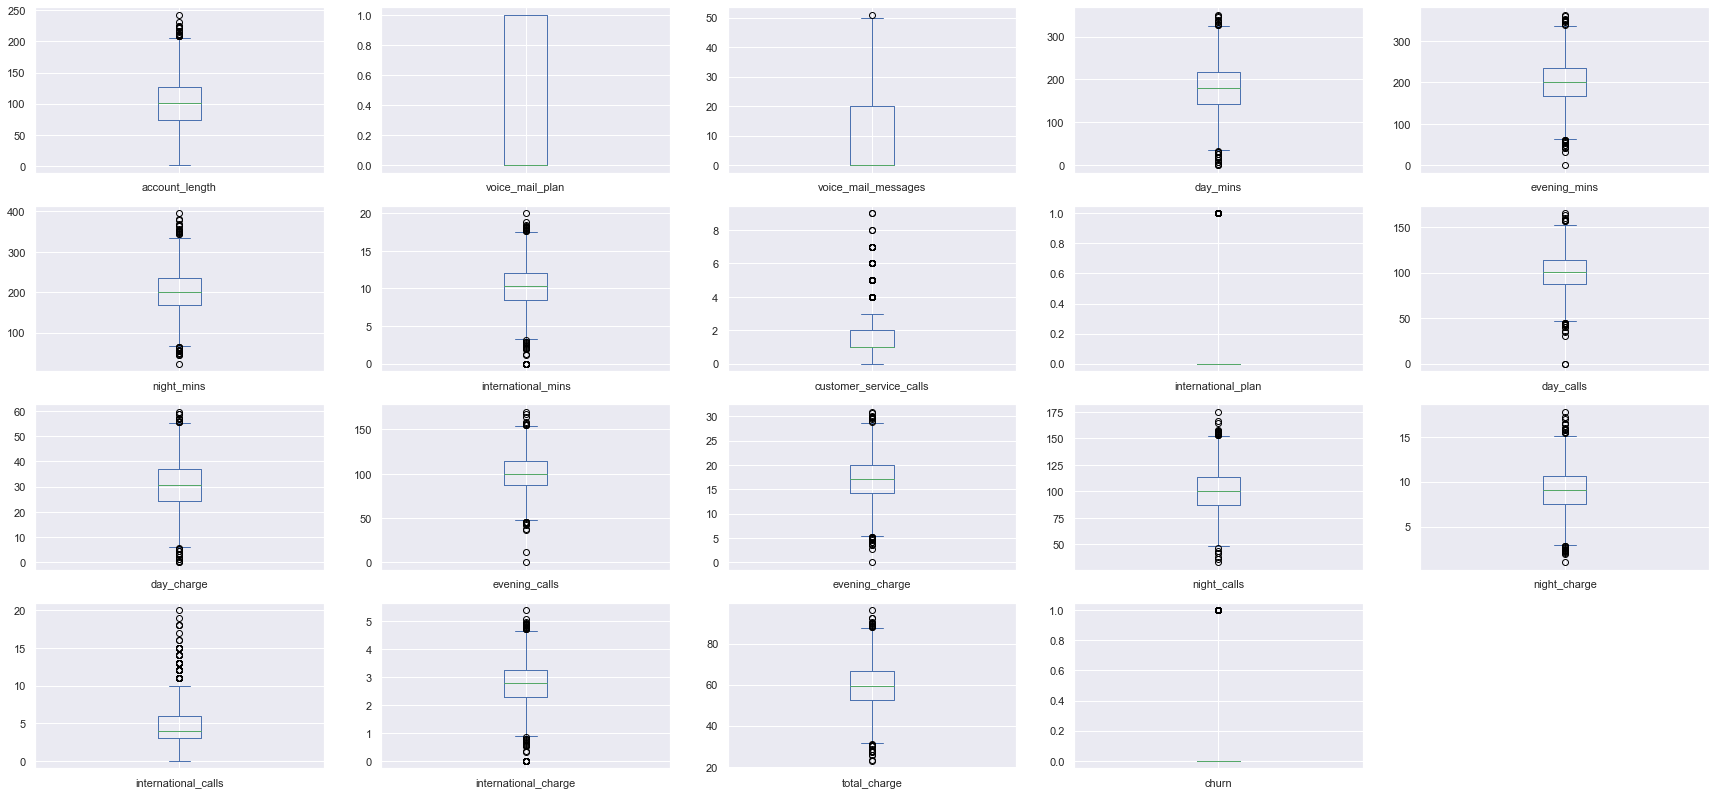

In [56]:
#box plot
tlc.plot(kind='box',subplots=True,layout=(4,5),sharex=False,sharey=False)
plt.show()

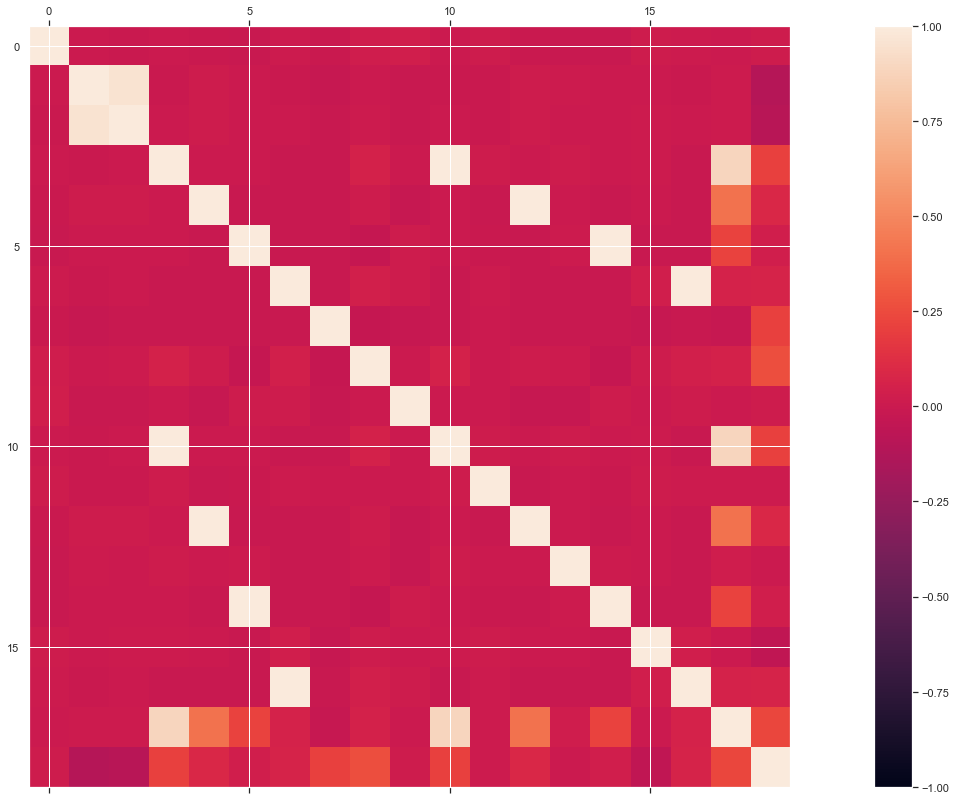

In [57]:
# correlation matrix plot
correlations = tlc.corr()
fig = plt.figure()
ax = fig.add_subplot(111) #"111" means "1x1 grid, first subplot" 
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

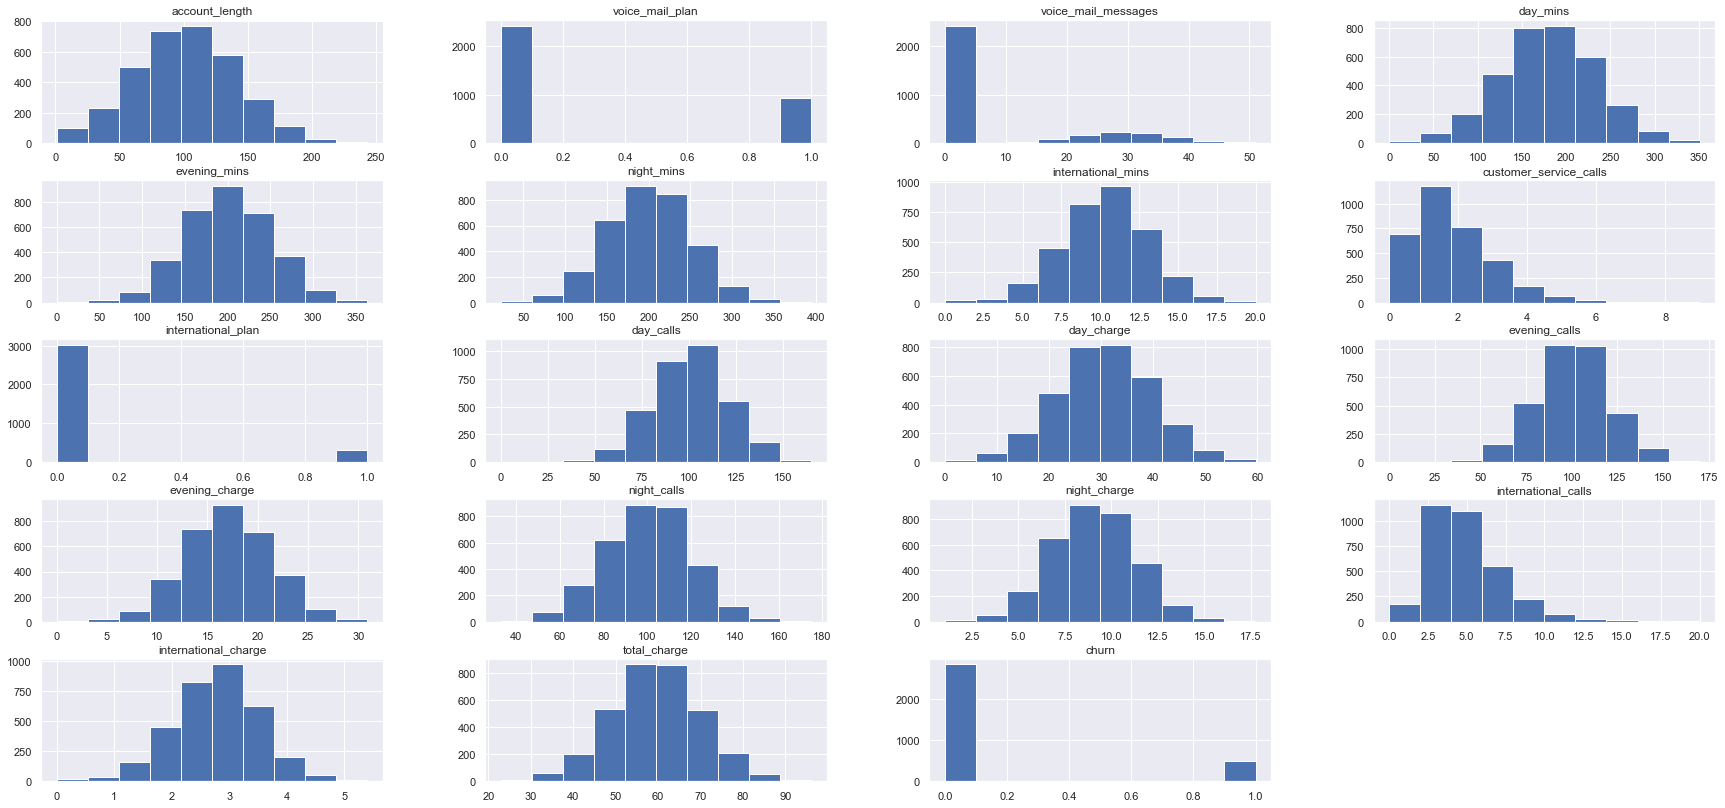

In [58]:
# Histogram of given data
sns.set(rc={'figure.figsize':(30,14)})
tlc.hist()
plt.show()

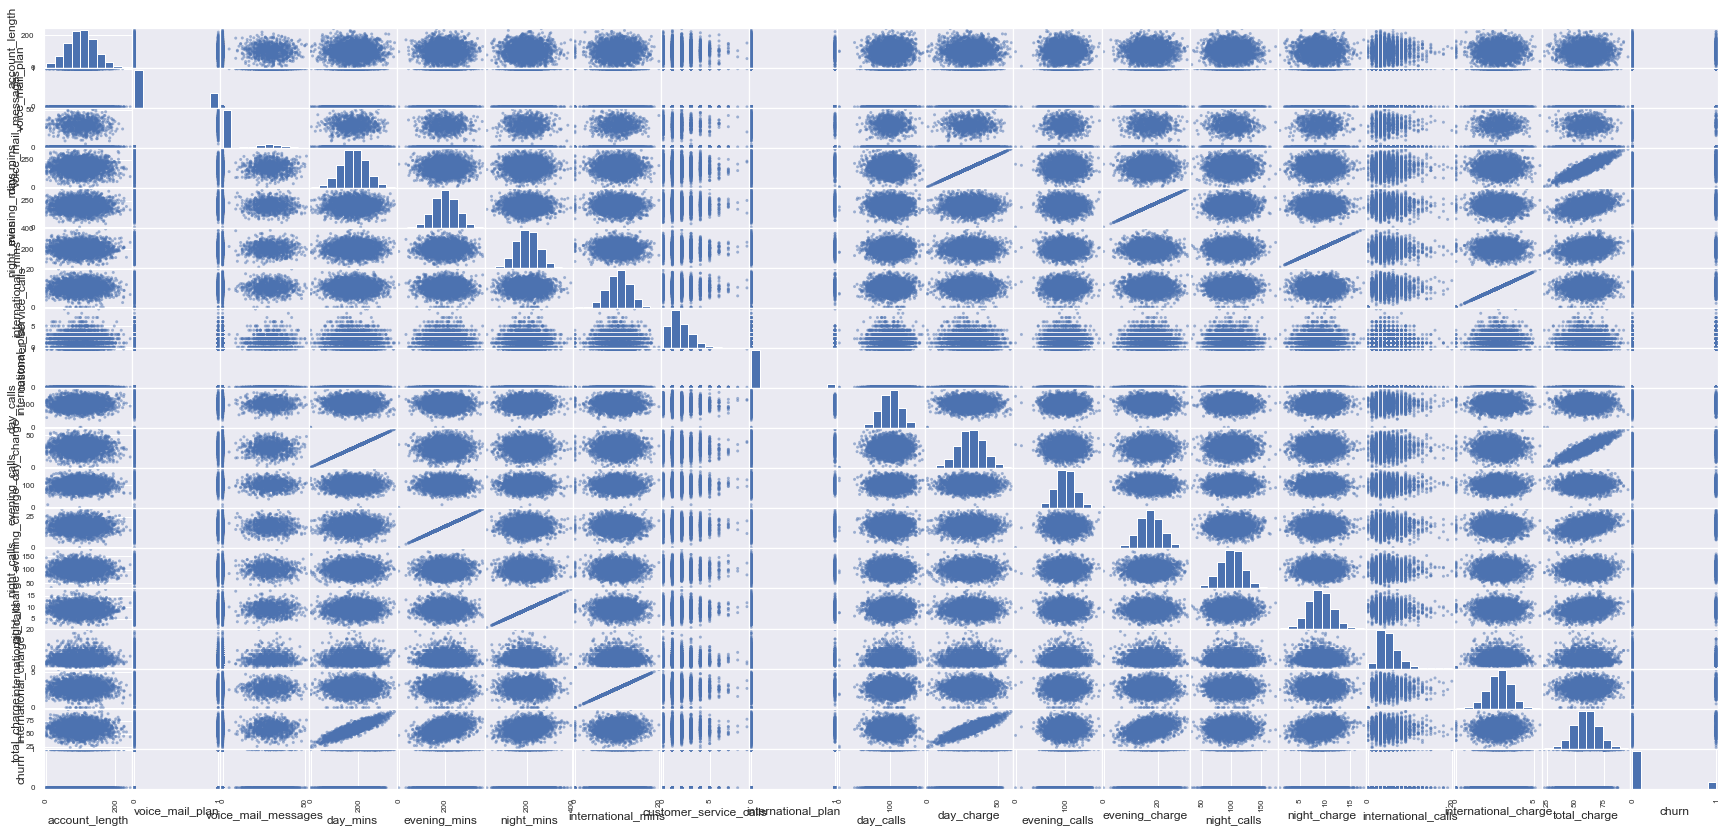

In [59]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix

scatter_matrix(tlc)
plt.show()

# Data Rescaling 

In [60]:
# Rescale data ( between X and Y)
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = tlc.values
# separate array into input and output components
X = array[:,0:17]
Y = array[:,18]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.52 1.   0.49 0.76 0.54 0.6  0.5  0.11 0.   0.67 0.76 0.58 0.54 0.41
  0.6  0.15 0.5 ]
 [0.44 1.   0.51 0.46 0.54 0.62 0.69 0.11 0.   0.75 0.46 0.61 0.54 0.49
  0.62 0.15 0.69]
 [0.56 0.   0.   0.69 0.33 0.37 0.61 0.   0.   0.69 0.69 0.65 0.33 0.5
  0.38 0.25 0.61]
 [0.34 0.   0.   0.85 0.17 0.47 0.33 0.22 1.   0.43 0.85 0.52 0.17 0.39
  0.47 0.35 0.33]
 [0.31 0.   0.   0.48 0.41 0.44 0.51 0.33 1.   0.68 0.48 0.72 0.41 0.62
  0.44 0.15 0.51]]


# Data Standardization 

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.676  1.617  1.235  1.567 -0.071  0.867 -0.085 -0.428 -0.328  0.477
   1.567 -0.056 -0.07  -0.465  0.866 -0.601 -0.086]
 [ 0.149  1.617  1.308 -0.334 -0.108  1.059  1.24  -0.428 -0.328  1.125
  -0.334  0.145 -0.108  0.148  1.059 -0.601  1.241]
 [ 0.903 -0.618 -0.592  1.168 -1.573 -0.757  0.703 -1.188 -0.328  0.676
   1.168  0.496 -1.574  0.199 -0.756  0.212  0.697]
 [-0.429 -0.618 -0.592  2.197 -2.743 -0.079 -1.303  0.332  3.053 -1.467
   2.197 -0.608 -2.743 -0.568 -0.079  1.024 -1.306]
 [-0.655 -0.618 -0.592 -0.24  -1.039 -0.276 -0.049  1.093  3.053  0.626
  -0.24   1.099 -1.038  1.068 -0.277 -0.601 -0.046]]


# Feature Engineering- Method1 

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_

array([14,  1,  4,  5,  6,  8,  3,  1,  1,  9, 11, 13,  7, 12, 10,  2,  1])

# Feature Engineering- Method 2

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.036 0.02  0.02  0.131 0.059 0.04  0.049 0.128 0.074 0.039 0.131 0.035
 0.057 0.034 0.04  0.056 0.049]


# Model validation Methods

In [64]:
# Evaluate using a train test split method
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
test_size = 0.33
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)


result = model.score(X_test, Y_test)

result*100.0

86.9090909090909

In [65]:
# Evaluate using cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100.0
results.std()*100.0

2.1778133734291405

# Accuracy Method

In [66]:
# cross Validation classification accuracy
kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


results.mean()
results.std()

0.021778133734291404

In [67]:
# Cross Validation Classification confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score #The F1 score can be interpreted as a weighted average of precision and recall
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

#F1 score
matrix = f1_score(Y_test, predicted)
matrix

0.26540284360189575

# Model Building

In [68]:
# CART Classification
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)

0.9183920447393501


In [69]:
# Gaussian Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8646859434284584


In [70]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.8784691877506248


In [71]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8562694430957905


In [72]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.880879682077287


In [73]:
# Bagged Decision Trees for Classification

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9504999010987035


In [74]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:17]
Y = array[:,18]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9504981028933125


In [75]:
# Voting Ensemble for Classification
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8739691787595978


# Comapare the algorithms

In [76]:
# Compare Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.856571 (0.022774)
KNN: 0.877270 (0.023727)
CART: 0.917195 (0.012728)
NB: 0.864686 (0.014736)
SVM: 0.856269 (0.027343)


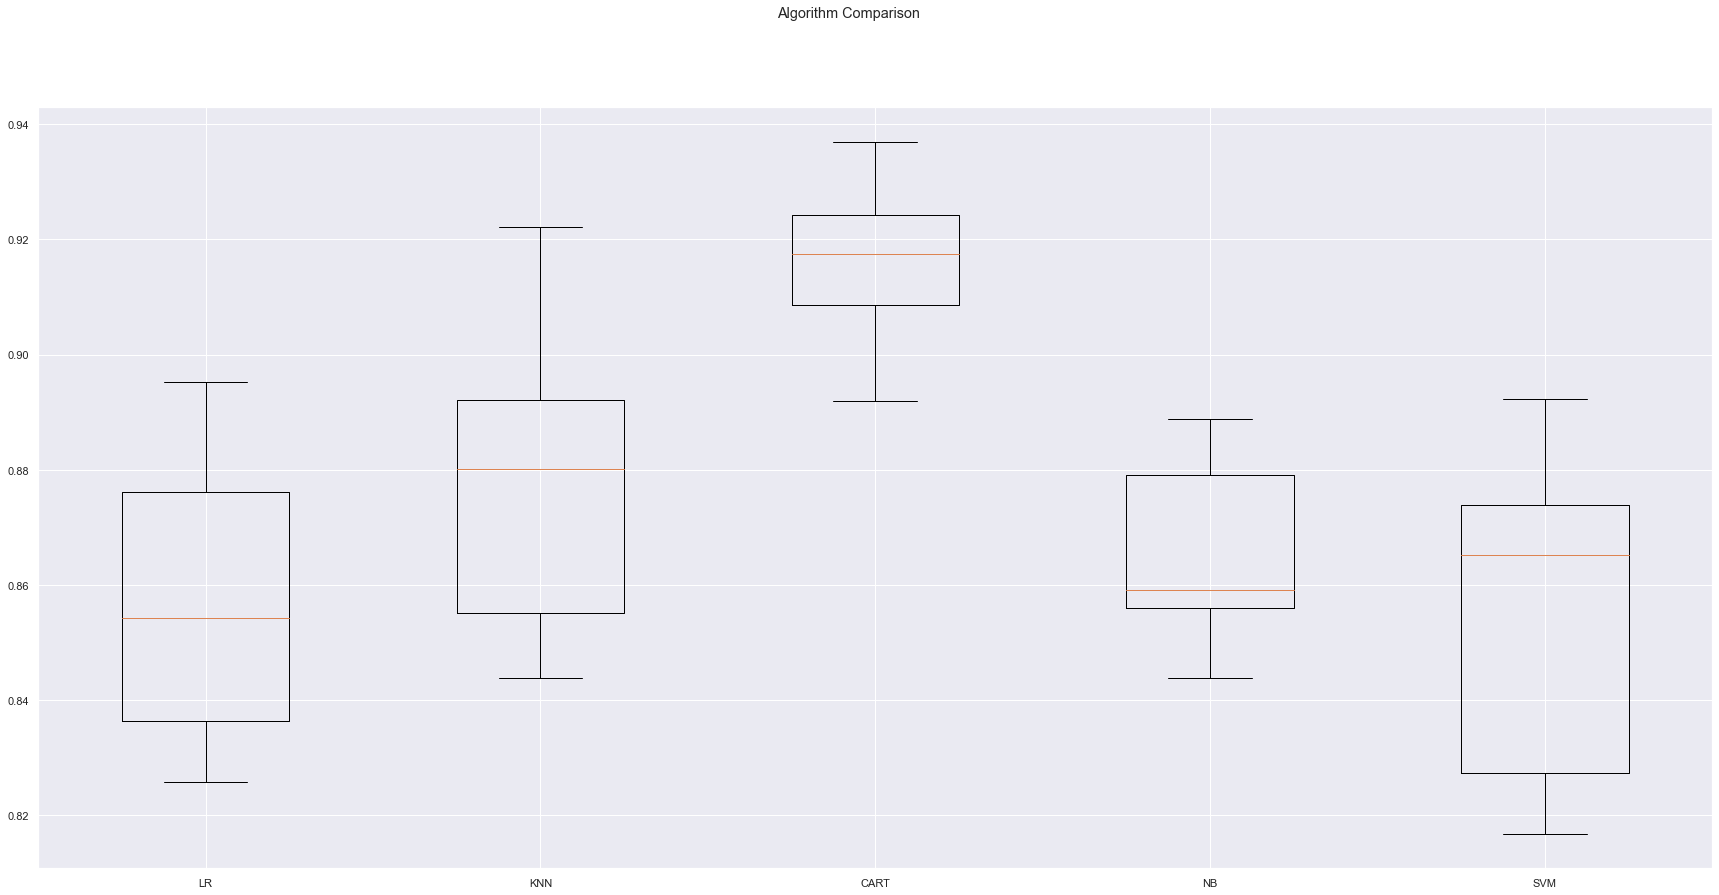

In [77]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# ML Pipelines

In [78]:
# Create a pipeline that standardizes the data then creates a model
from sklearn.pipeline import Pipeline
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8610697523871176


In [79]:
# Create a pipeline that extracts features from the data then creates a model
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8586727446008883


In [80]:
# Save Model Using Pickle and load and predict
from pickle import dump
from pickle import load
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open('filename', 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open('filename', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8536363636363636
